<a href="https://colab.research.google.com/github/khansartz/submission/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Khansa Maritza Ar-Rahmah
- **Email:** khansamaritzaar@gmail.com
- **ID Dicoding:** khansartz

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda paling tinggi
- Bagaimana performa penyewa sepeda tiap bulan per tahun
- Berapa rata-rata jumlah penyewa sepeda berdasarkan musim dan kondisi cuaca

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Membaca dataset dengan format file csv

### Assessing Data

#### Menilai Tabel `day_df`

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing values, duplikat, dan inaccurate value
- Terdapat kesalahan tipe data pada kolom dteday pada data `day_df`


### Cleaning Data

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data pada kolom dteday pada data `day_df` sudah diubah dari tipe data object menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

#### Explore `day_df`



In [9]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
533,534,2012-06-17,2,1,6,0,0,0,1,0.592500,0.571975,0.598750,0.144904,2634,4344,6978
429,430,2012-03-05,1,1,3,0,1,1,1,0.243333,0.241171,0.506250,0.228858,203,3130,3333
73,74,2011-03-15,1,0,3,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289,1767,2056


In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
day_df.instant.is_unique

True

In [12]:
day_df.groupby(by="season").agg({
    "cnt": "sum"
})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [13]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
})

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

In [14]:
day_df.groupby(by=["yr", "weekday"]).agg({
    "cnt": "sum"
})

cnt
yr weekday        
0  0        177074
   1        180221
   2        180338
   3        169169
   4        174552
   5        182006
   6        179743
1  0        266953
   1        275282
   2        288771
   3        303879
   4        310843
   5        305784
   6        298064

In [15]:
day_df.groupby(by=["yr", "weathersit"]).agg({
    "cnt": "mean"
})

cnt
yr weathersit             
0  1           3694.986726
   2           3088.096774
   3           1674.133333
1  1           6003.734177
   2           4991.333333
   3           2126.166667

**Insight:**
- Diketahui bahwa jumlah penyewa sepeda pada musim fall (atau gugur) lebih banyak daripada ketuga musim lainnya.
- Diketahui bahwa rata-rata penyewa sepeda lebih tinggi pada saat cuaca cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling tinggi

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<ipython-input-17-62ec3263b5c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-17-62ec3263b5c1>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([season_labels[season] for season in byseason_df["season"]])


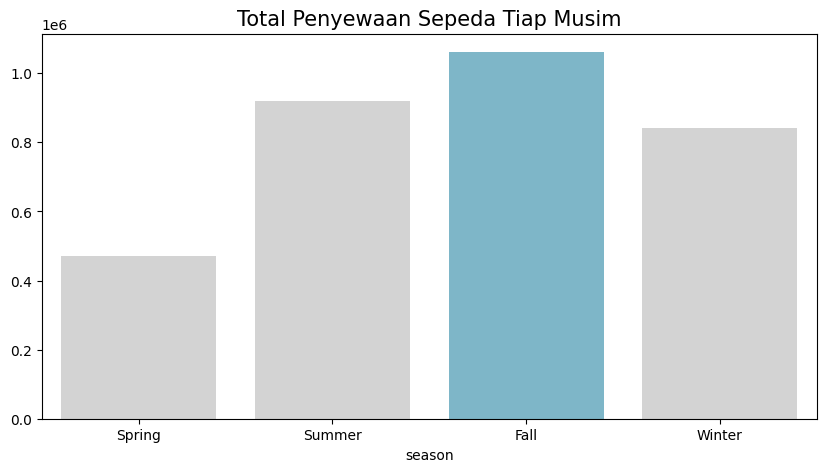

In [17]:
byseason_df = day_df.groupby(by="season").agg({"cnt": "sum"}).reset_index()
byseason_df.rename(columns={"cnt": "total_rentals"}, inplace=True)


# Ubah format angka menjadi nama musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3",]

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    y="total_rentals",
    x="season",
    data=byseason_df.sort_values(by="total_rentals", ascending=False),
    palette=colors
)

ax.set_xticklabels([season_labels[season] for season in byseason_df["season"]])

plt.title("Total Penyewaan Sepeda Tiap Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

### Pertanyaan 2: Bagaimana performa penyewa sepeda tiap bulan per tahun

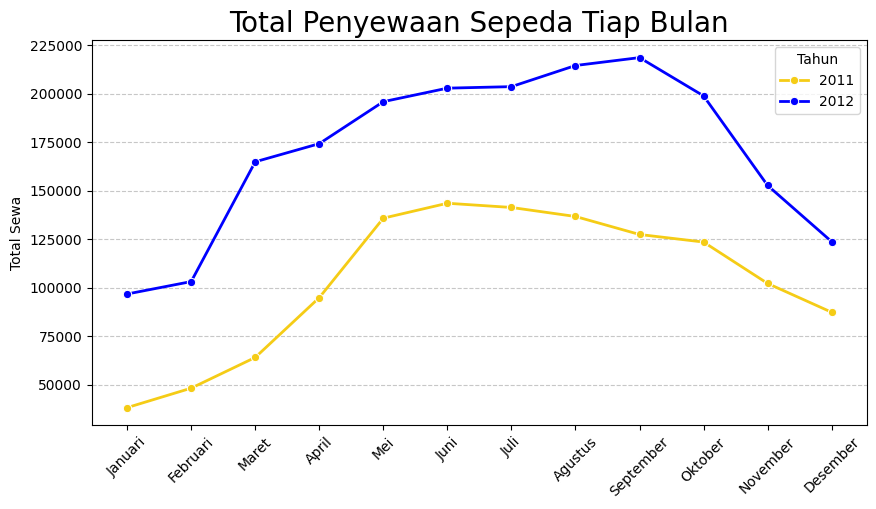

In [18]:
monthly_rentals_df = day_df.groupby(by=["yr", "mnth"]).agg({"cnt": "sum"}).reset_index()

# Ubah format angka menjadi tahun
monthly_rentals_df["yr"] = monthly_rentals_df["yr"].map({0: "2011", 1: "2012"})

# Ubah format angka menjadi nama bulan
month_map = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April",
    5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus",
    9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}
monthly_rentals_df["mnth"] = monthly_rentals_df["mnth"].map(month_map)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_rentals_df,
    x="mnth",
    y="cnt",
    hue="yr",
    marker='o',
    linewidth=2,
    palette=["#f5cc16","blue"]
)

plt.title("Total Penyewaan Sepeda Tiap Bulan", loc="center", fontsize=20)
plt.xlabel(None)
plt.ylabel("Total Sewa")
plt.xticks(rotation=45)
plt.legend(title="Tahun")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Insight:**
- Dari visualisasi tersebut, diketahui bahwa penyewa sepeda paling banyak ada di musin gugur (fall)
- Penyewaan sepeda paling banyak pada tahun 2011 ada di bulan Juni, sedangkan pada tahun 2012 ada di bulan September

## Analisis Lanjutan Menggunakan Clustering - Manual Grouping

### Pertanyaan 3: Berapa rata-rata jumlah penyewa sepeda berdasarkan musim dan kondisi cuaca

In [19]:
day_df["cnt"].describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


In [20]:
df_cluster = day_df.copy()

df_grouped = df_cluster.groupby(["season", "weathersit"]).agg({
    "cnt": "mean"
}).reset_index()

df_grouped.rename(columns={"cnt": "avg_rentals"}, inplace=True)

print(df_grouped.head())

   season  weathersit  avg_rentals
0       1           1  2811.135135
1       1           2  2357.166667
2       1           3   934.750000
3       2           1  5548.548673
4       2           2  4236.705882


#### Rata-rata Penyewa Sepeda per Musim


<ipython-input-21-47cb17408ea9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="avg_rentals", data=df_grouped, palette=colors_season, errorbar=None)


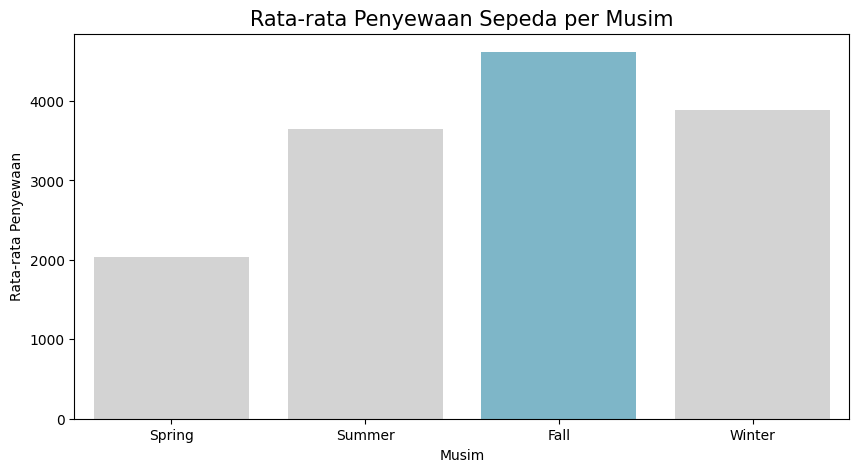

In [21]:
plt.figure(figsize=(10, 5))
colors_season = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3",]
sns.barplot(x="season", y="avg_rentals", data=df_grouped, palette=colors_season, errorbar=None)
plt.title("Rata-rata Penyewaan Sepeda per Musim", fontsize=15)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

#### Rata-rata Penyewa Sepeda Berdasarkan Cuaca

<ipython-input-22-4cbb839e1d70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="avg_rentals", data=df_grouped, palette=colors_weathersit, errorbar=None)
<ipython-input-22-4cbb839e1d70>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x="weathersit", y="avg_rentals", data=df_grouped, palette=colors_weathersit, errorbar=None)


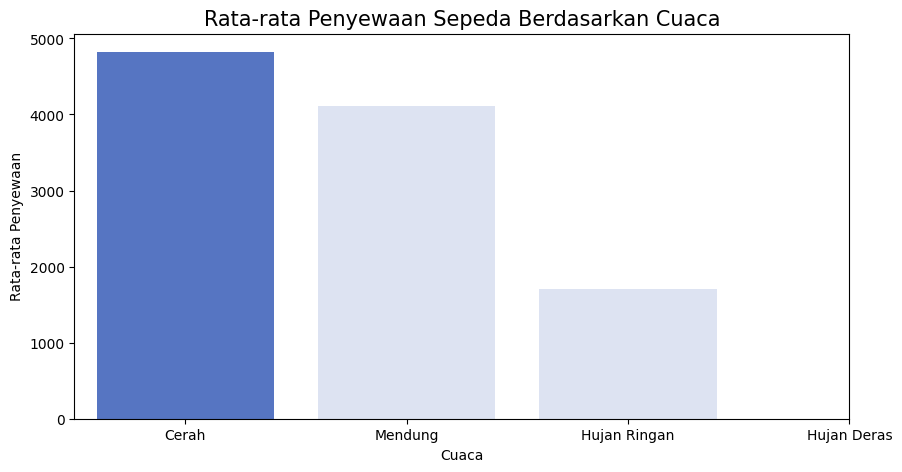

In [22]:
plt.figure(figsize=(10, 5))
colors_weathersit = ["#446DD4", "#dae1f5", "#dae1f5", "#dae1f5",]
sns.barplot(x="weathersit", y="avg_rentals", data=df_grouped, palette=colors_weathersit, errorbar=None)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca", fontsize=15)
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Mendung", "Hujan Ringan", "Hujan Deras"])
plt.show()

**Insight:**
- Diketahui bahwa rata-rata penyewa sepeda di musim gugur (fall) mencapai lebih dari 4000 orang
- Diketahui bahwa rata-rata penyewa sepeda saat cuaca cerah mencapai lebih dari 4500 orang

## Conclusion

- Conclution pertanyaan 1 <br>
Mayoritas pengguna lebih suka menyewa sepeda padaa musim gugur (fall), diikuti oleh musim panas (summer),musim dingin (winter), dan musim semi (spring).

- Conclution pertanyaan 2 <br>
Pada tahun 2011, terjadi peningkatan pesat dalam penyewaan sepeda pada bulan Mei, diikuti penurunan yang stabil dari bulan Juni sampai Oktober. Sedangkan, pada tahun 2012, terjadi peningkatan pesat pada bulan Maret, kemudian mengalami kenaikan yang stabil dari bulan April sampai September, serta mengalami penurunan drastis pada bulan November.

- Conclution pertanyaan 3 <br>
Rata-rata penyewa sepeda tertinggi terjadi pada musim gugur (fall), dengan lebih dari 4000 orang. Selain itu, kondisi cuaca juga berpengaruh, di mana rata-rata penyewa sepeda saat cuaca cerah mencapai lebih dari 4500 orang.

In [24]:
day_df.to_csv("all_data.csv", index=False)